In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [75]:
(x_train, y_train), (x_test, y_test) = tf_keras.datasets.fashion_mnist.load_data()

In [76]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

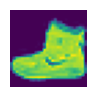

In [77]:
plt.figure(figsize=(1, 1))
plt.imshow(x_train[0])
plt.axis("off")
plt.show()

In [78]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [79]:
x_train2 = x_train / 255
x_test2 = x_test / 255

In [80]:
model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(28, 28, 1)))
model.add(tf_keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 activation="swish", 
                                 padding="same"
                                 ))
model.add(tf_keras.layers.MaxPooling2D(pool_size=2))

model.add(tf_keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 activation="swish", 
                                 padding="same"
                                 ))
model.add(tf_keras.layers.MaxPooling2D(pool_size=2))

model.add(tf_keras.layers.Flatten())

model.add(tf_keras.layers.Dense(units=128, activation="swish"))
model.add(tf_keras.layers.Dropout(0.3))
model.add(tf_keras.layers.Dense(units=64, activation="swish"))
model.add(tf_keras.layers.Dropout(0.3))
model.add(tf_keras.layers.Dense(units=32, activation="swish"))
model.add(tf_keras.layers.Dropout(0.3))
model.add(tf_keras.layers.Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,018 (1.64 MB)

 Trainable params: 431,018 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(
    monitor = "val_loss",
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    x_train2, y_train,
    validation_split = 0.2,
    epochs = 2,
    batch_size = 256,
    verbose = 1,
    callbacks =  [early_stop]
)

Epoch 1/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.5251 - loss: 1.3318 - val_accuracy: 0.8290 - val_loss: 0.4544
Epoch 2/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.8080 - loss: 0.5434 - val_accuracy: 0.8572 - val_loss: 0.3824


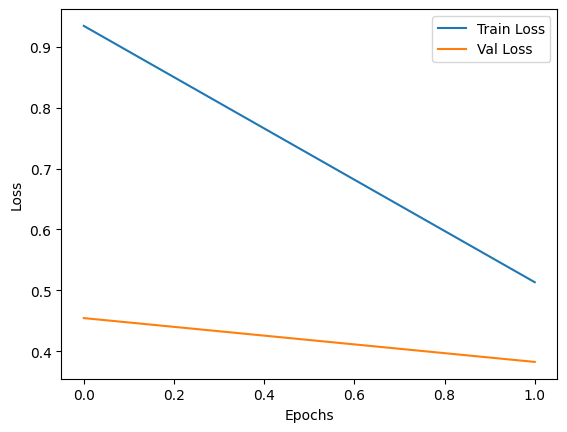

In [84]:
plt.plot(history.history['loss'], label = "Train Loss")
plt.plot(history.history['val_loss'], label = "Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [85]:
model.evaluate(x_train2, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8646 - loss: 0.3650


[0.3703961670398712, 0.8638833165168762]

In [86]:
model.evaluate(x_test2, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8588 - loss: 0.3908


[0.4005836546421051, 0.8521999716758728]

In [87]:
# #모델 구조 설계2 : 함수형 API

input = tf_keras.layers.Input(shape=(28, 28, 1))

Conv2D_1 = tf_keras.layers.Conv2D(filters=32, kernel_size=3, activation="swish", padding="same")
max_pool2D_1 = tf_keras.layers.MaxPooling2D(pool_size=2)

Conv2D_2 = tf_keras.layers.Conv2D(filters=64, kernel_size=3, activation="swish", padding="same")
max_pool2D_2 = tf_keras.layers.MaxPooling2D(pool_size=2)

flatten = tf_keras.layers.Flatten()

dense_1 = tf_keras.layers.Dense(units=128, activation="swish")
dropout_1 = tf_keras.layers.Dropout(0.3)

dense_2 = tf_keras.layers.Dense(units=64, activation="swish")
dropout_2 = tf_keras.layers.Dropout(0.3)

dense_3 = tf_keras.layers.Dense(units=32, activation="swish")
dropout_3 = tf_keras.layers.Dropout(0.3)

output = tf_keras.layers.Dense(units=10, activation="softmax")

In [88]:
# 입력 레이어
output2 = Conv2D_1(input)  # Conv2D 첫 번째 레이어 적용
output2 = max_pool2D_1(output2)  # MaxPooling2D 첫 번째 레이어 적용

# Conv2D와 MaxPooling2D 두 번째 레이어 적용
output2 = Conv2D_2(output2)
output2 = max_pool2D_2(output2)

# Flatten 레이어 적용
output2 = flatten(output2)

# Fully Connected 레이어와 Dropout 적용
output2 = dense_1(output2)
output2 = dropout_1(output2)

output2 = dense_2(output2)
output2 = dropout_2(output2)

output2 = dense_3(output2)
output2 = dropout_3(output2)

# 최종 출력 레이어
output2 = output(output2)

# 모델 생성
model2 = tf_keras.Model(inputs=input, outputs=output2)

# 모델 요약 출력
model2.summary()

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,018 (1.64 MB)

 Trainable params: 431,018 (1.64 MB)

 Non-trainable params: 0 (0.00 B)